In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
import brian2 as br

$\dfrac{\partial \nu_E}{\partial t} = \dfrac{-\nu_E + [M_{EE} \nu_E + M_{EI} \nu_I - \gamma_E]}{\tau_E}$

$\dfrac{\partial \nu_I}{\partial t} = \dfrac{-\nu_I + [M_{IE} \nu_E + M_{II} \nu_I - \gamma_I]}{\tau_I}$

In [17]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline


class Animationcls():

    def __init__(self,Lines,Pathes,init_data, fig, draw_mode):

        # Lines  --> [phase_line, v_line, w_line]
        # Pathes contian the tuples that the first element is the t_list and second element is x_list
        self.L = len(Lines)
        self.LP = len(Pathes)
        self.Lines = [1] * self.L
        self.Pathes = [1] * self.LP
        self.init_data = [1] * self.L
        self.draw_mode = draw_mode

        for i in range(self.L):
            self.Lines[i] = Lines[i]

        for i in range(self.LP):
            self.Pathes[i] = Pathes[i]

        for i in range(self.L):
            self.init_data[i] = init_data[i]

        self.fig = fig



    def init(self):

        for i in range(self.L):
            self.Lines[i].set_data(self.init_data[i])

        #self.Lines_list[0].set_data([0],[0])
        #self.Lines_list[1].set_data(t[-50], x[-50])
        #self.Lines_list[2].set_data([0],[0])
        return self.Lines


    def animate(self, i):
        speed = 25
        for ii in range(self.L):
            if self.draw_mode[ii] == 'line':
                self.Lines[ii].set_data(self.Pathes[ii][0][:speed * i],self.Pathes[ii][1][:speed * i])
            else:
                self.Lines[ii].set_data(self.Pathes[ii][0][speed * i],self.Pathes[ii][1][speed * i])

        #self.Lines_list[1].set_data(t[i],x[i])
        #self.Lines_list[1].set_data(t[-i],x[-i])
        #self.Lines_list[2].set_data([0], x[i])
        return self.Lines

    def start_animation(self):
        anim = animation.FuncAnimation(self.fig, self.animate, init_func = self.init,frames=10, interval=25, blit=True, repeat= True)
        #Writer = animation.writers['ffmpeg']
        #writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1500)
        #anim.save('lines.mp4', writer=writer)
        #plt.show()
        return anim


In [32]:
def diff(statemon, tau_I, gamma_E = -10, gamma_I=10):
    
    tau_E = 10*br.ms
    #tau_I = 10*br.ms
    M_EE = 1.25
    M_EI = -1
    M_IE = 1
    M_II = 0
    gamma_E = gamma_E*br.Hz
    gamma_I = gamma_I*br.Hz
    
    #v_E = np.array(statemon.v_E[0])
    #v_I = np.array(statemon.v_I[0])
    
    v_E_max = np.max(statemon1.v_E[0]/br.Hz + 0.1*statemon1.v_E[0]/br.Hz)
    v_E_min = np.min(statemon1.v_E[0]/br.Hz - 0.1*statemon1.v_E[0]/br.Hz)
    v_I_max = np.max(statemon1.v_I[0]/br.Hz + 0.1*statemon1.v_I[0]/br.Hz)
    v_I_min = np.min(statemon1.v_I[0]/br.Hz - 0.1*statemon1.v_I[0]/br.Hz)
    v_E_list = np.linspace(v_E_min, v_E_max, 100)
    v_I_list = np.linspace(v_I_min, v_I_max, 100)
    
    v_I_grid, v_E_grid = np.meshgrid(v_I_list, v_E_list) * br.Hz
    


    
    dot_v_E = (-v_E_grid + (M_EE*v_E_grid + M_EI*v_I_grid - gamma_E))/tau_E  
    dot_v_I = (-v_I_grid + (M_IE*v_E_grid + M_II*v_I_grid - gamma_I))/tau_I 

    return [(np.array(v_E_grid),np.array(dot_v_E)), (np.array(v_I_grid),np.array(dot_v_I))]

In [33]:
def run_simulation(tau_I,gamma_E = -10, gamma_I = 10):

    br.start_scope()


    tau_E = 10*br.ms
    #tau_I = 10*br.ms
    M_EE = 1.25
    M_EI = -1
    M_IE = 1
    M_II = 0
    gamma_E = gamma_E*br.Hz
    gamma_I = gamma_I*br.Hz

    equ1 = '''
    dv_E/dt = (-v_E + (M_EE*v_E + M_EI*v_I - gamma_E))/tau_E : Hz 
    v_I : Hz (linked)
    '''

    equ2 = '''
    dv_I/dt = (-v_I + (M_IE*v_E + M_II*v_I - gamma_I))/tau_I : Hz
    v_E : Hz (linked)
    '''

    G1 = br.NeuronGroup(1, equ1, method = 'euler')
    G2 = br.NeuronGroup(1, equ2, method = 'euler')
    
    
    G1.v_E = 50 *br.Hz
    G2.v_I = 50 *br.Hz
    
    
    G2.v_E = br.linked_var(G1, 'v_E' )
    G1.v_I = br.linked_var(G2, 'v_I' )


    statemon1 = br.StateMonitor(G1, ['v_I', 'v_E'], record=True)
    #statemon2 = br.StateMonitor(G2, ['dv_I/dt', 'dv_E/dt'], record=True)


    br.run(400*br.ms)

    
    return statemon1

In [34]:
def plotter(statemon1, diff_date):
    fig = plt.figure(figsize=(13,13))

    ax_m = fig.add_subplot(3,3,(2,6))
    ax_m.plot(statemon1.v_I[0], statemon1.v_E[0],lw=4)
    ax_m.streamplot(diff_data[1][0], diff_data[0][0],
                    diff_data[1][1], diff_data[0][1])
    
    line_master, = ax_m.plot([],[],'ro')


    ax = fig.add_subplot(3,3,(1,4), sharey=ax_m)
    ax.plot(statemon1.t/br.ms, statemon1.v_E[0])
    ax.set_ylabel('$\\nu_E$', size=30)
    ax.grid('on')
    
    line1, = ax.plot([],[],'ro')
    

    ax = fig.add_subplot(3,3,(8,9), sharex=ax_m)
    ax.plot(statemon1.v_I[0], statemon1.t/br.ms)
    ax.set_xlabel('$\\nu_I$', size=30)
    ax.grid('on')
    
    line2, = ax.plot([],[],'ro')
    

    ax = fig.add_subplot(3,3,7)
    ax.axis('off')
    ax.text(0.5,1,"Neural\nDynamic\nQuestion2\n\n$\\tau_I$={} msec".format(tau_I*1000),ha='center',
            va='top',size=20)
    
    
    
    Lines = [line_master, line1, line2]
    Pathes = [(statemon1.v_I[0], statemon1.v_E[0]),(statemon1.t/br.ms, statemon1.v_E[0]),(statemon1.v_I[0], statemon1.t/br.ms)]
    init_data = [(Pathes[0][0],Pathes[0][0]),(Pathes[1][0],Pathes[1][0]),(Pathes[2][0],Pathes[2][0])]
    draw_mode = ['point', 'point', 'point']
    animobj = Animationcls(Lines, Pathes, init_data, fig, draw_mode)
    #annim = animobj.start_animation()
    #HTML(annim.to_html5_video())
    

## Runnig the Simulations

In [50]:
tau_I = 20*br.ms
statemon1 = run_simulation(tau_I)
diff_data = diff(statemon1, tau_I)

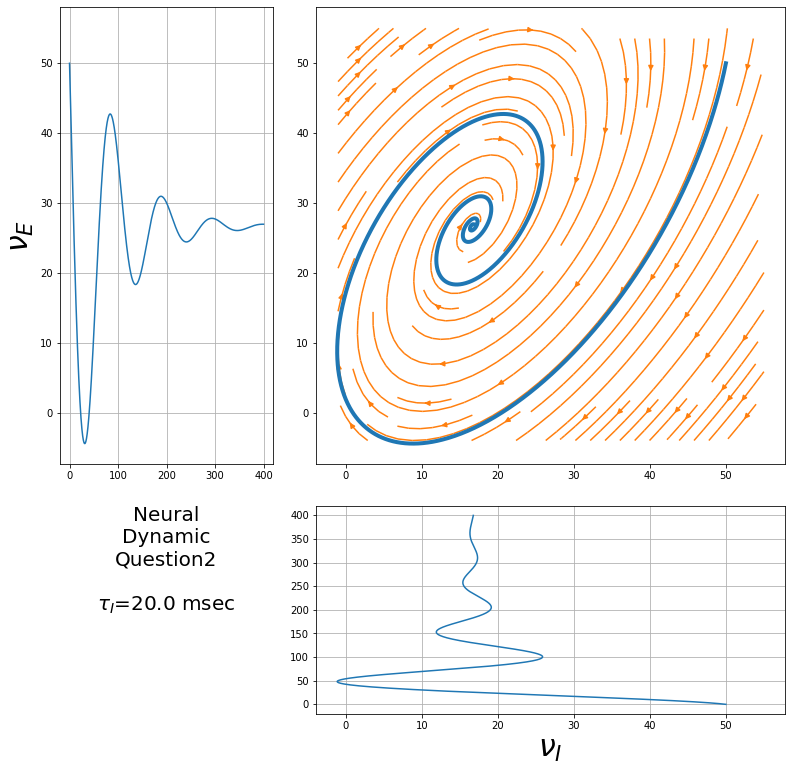

In [51]:
plotter(statemon1, diff_data)

# توجه کنید که فایل های انیمیشن در فایلی جداگانه ارسال خواهند شد 

من دقیقا متوجه نشدم وقتی گفته شده که بخش های غیر خطی را حذف کنید به چه معنی است. چرا که معادلات خطی هستند. تنها ایده ای که به ذهنم رسید این بود که مقدار گاما ها را برابر صفر قرار دهم تا معادلات به شکل همگن دربیایند.

تغییری که به وجود می آید این است که نرخ اسپایک حول صفر نوسان میکند

In [52]:
tau_I = 20*br.ms
statemon1 = run_simulation(tau_I,0,0)
diff_data = diff(statemon1, tau_I,0,0)
plotter(statemon1, diff_data)

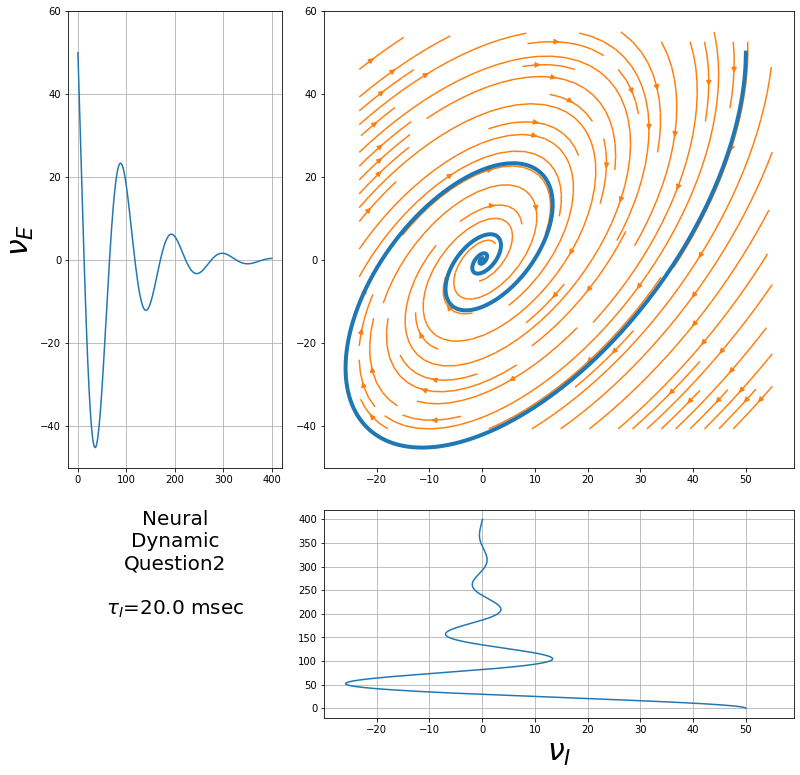

In [53]:
plotter(statemon1, diff_data)

# مقدار دهی تاو با مقادیر متفاوت
با قرار دادن مقادیر متفاوت به جای تاو به دینامیک های جالبی میرسیم. برای مثال برای تاو های کمتر از ۴۰ سیستم پایدار بوده  و به یک مقدار ثابتی میل میکند. به ازای تاو نزدیکی های صفر دارای چرخه حدی هستیم و به ازای تاو های بالاتر از ۴۰ سیستم دچار واگرایی میشود

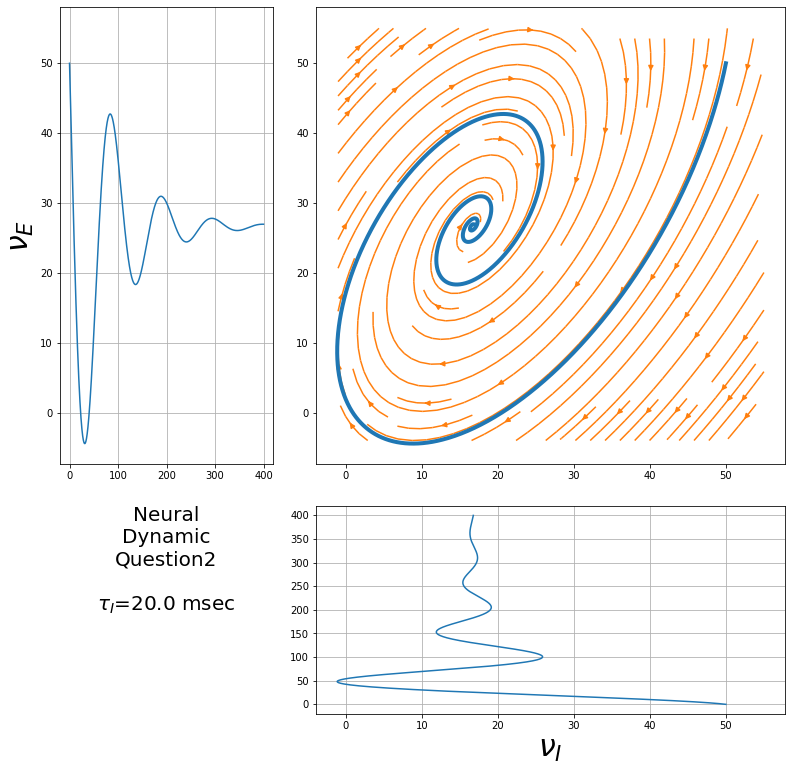

In [54]:
tau_I = 20*br.ms
statemon1 = run_simulation(tau_I)
diff_data = diff(statemon1, tau_I)
plotter(statemon1, diff_data)

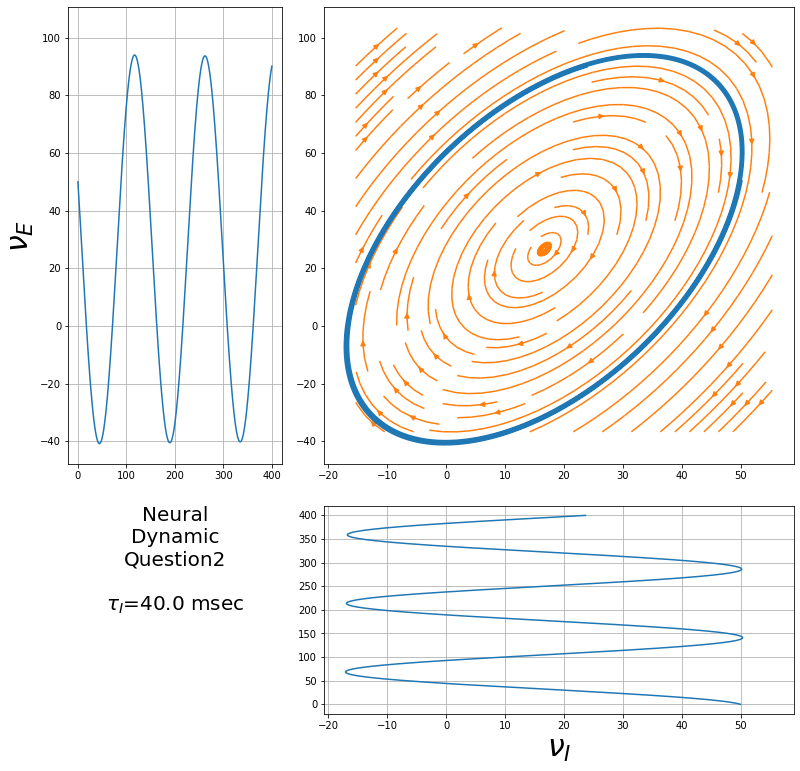

In [55]:
tau_I = 40*br.ms
statemon1 = run_simulation(tau_I)
diff_data = diff(statemon1, tau_I)
plotter(statemon1, diff_data)

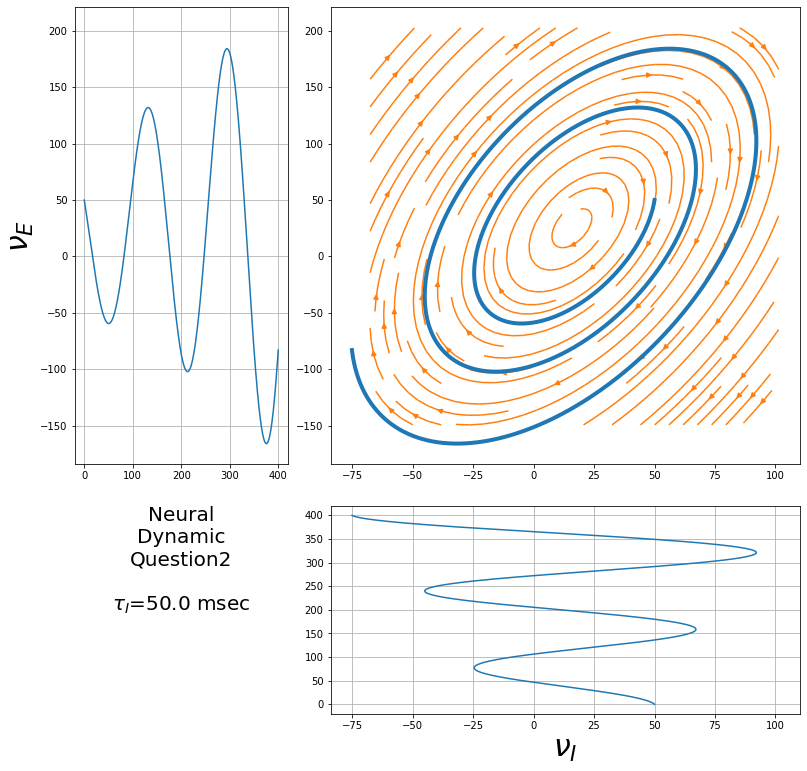

In [57]:
tau_I = 50*br.ms
statemon1 = run_simulation(tau_I)
diff_data = diff(statemon1, tau_I)
plotter(statemon1, diff_data)

برای دیدن انیمیشن ها لازم است که فایل 
animations.py 
را اجرا بکنید. مقداری که میخواهد برای تاوـای بدهید را لازم است که به عنوان آرگومان تابع قرار دهید.
برای مثال دستور زیر انیمیشن هارو به ازای تاو ۱۲ رسم خواهد کرد:

```
$ python3 animations.py -tau_I 12
```